<a href="https://colab.research.google.com/github/NickNack08/ML-For-Image-Analysis/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==1.0.3

In [2]:
import sys
import torch.nn as nn
import torch
from d2l import torch as d2l

In [3]:
class AvgPoolingLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.Sigmoid(),
                                 nn.AvgPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.Sigmoid(),
                                 nn.AvgPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.Sigmoid(),
                                 nn.LazyLinear(84),
                                 nn.Sigmoid(),
                                 nn.LazyLinear(num_classes))

def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

acc: 0.47


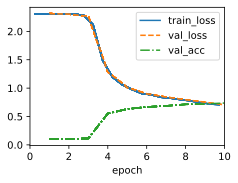

In [5]:
data = d2l.FashionMNIST(batch_size=128)
model = AvgPoolingLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))

print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

acc: 0.57


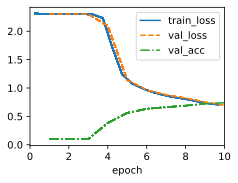

In [6]:
class MaxPoolingLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.Sigmoid(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.Sigmoid(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.Sigmoid(),
                                 nn.LazyLinear(84),
                                 nn.Sigmoid(),
                                 nn.LazyLinear(num_classes))

def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)
data = d2l.FashionMNIST(batch_size=128)
model = MaxPoolingLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))

print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

b. Replace the sigmoid activation function with the rectified linear unit (ReLU)

In [7]:
class SigmoidActivation(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.Sigmoid(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.Sigmoid(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.Sigmoid(),
                                 nn.LazyLinear(84),
                                 nn.Sigmoid(),
                                 nn.LazyLinear(num_classes))

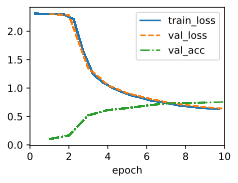

In [8]:
model = SigmoidActivation(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [9]:
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

acc: 0.58


In [10]:
class ReLULeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.ReLU(),
                                 nn.LazyLinear(84),
                                 nn.ReLU(),
                                 nn.LazyLinear(num_classes))

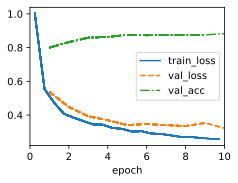

In [11]:
model = ReLULeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [12]:
y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

acc: 0.85


8. Change the size of the LeNet network architecture to improve its accuracy in addition to maxpooling and ReLU

In [13]:
class ParamLeNet(d2l.Classifier):
    def __init__(self, convs, linears, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for conv in convs:
            layers.append(nn.LazyConv2d(conv[0], kernel_size=conv[1],
                                        padding=conv[2]))
            layers.append(nn.ReLU())
            layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        layers.append(nn.Flatten())
        for linear in linears:
            layers.append(nn.LazyLinear(linear))
            layers.append(nn.ReLU())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)

a. Adjust the convolution kernel size.

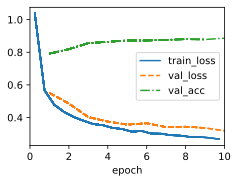

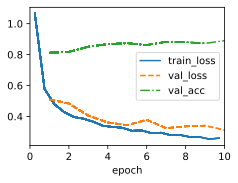

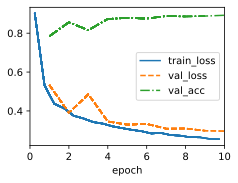

In [14]:
convs_list = [[[6,11,5],[16,11,0]],[[6,5,2],[16,5,0]],[[6,3,1],[16,3,0]]]
acc_list = []
for convs in convs_list:
    hparams = {'convs':convs, 'linears':[120,84]}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

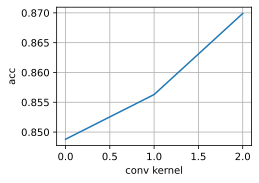

In [15]:
d2l.plot(list(range(len(acc_list))),acc_list,'conv kernel','acc')

b. Adjust the number of convolution layers.

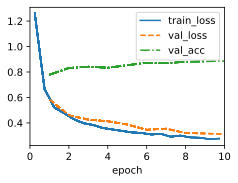

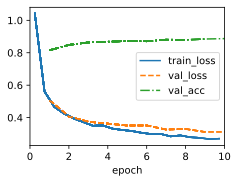

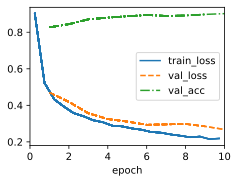

In [16]:
convs_list = [[[6,5,2],[16,5,2],[32,5,0]],[[6,5,2],[16,5,0]],[[64,5,0]]]
acc_list = []
for convs in convs_list:
    hparams = {'convs':convs, 'linears':[120,84]}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

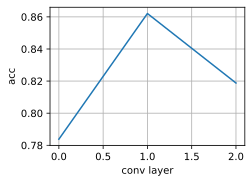

In [17]:
d2l.plot(list(range(len(acc_list))),acc_list,'conv layer','acc')

c. Adjust the number of fully connected layers.

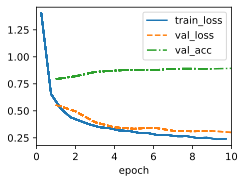

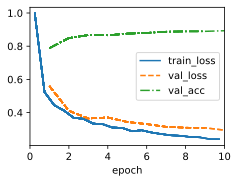

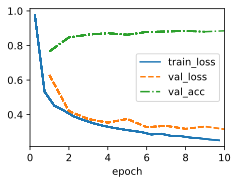

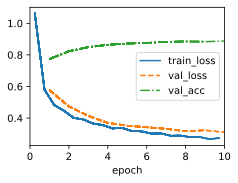

In [18]:
linears_list = [[256,128,64,32,16],[256,128],[120,84],[64,32]]
acc_list = []
for linears in linears_list:
    hparams = {'convs':[[6,5,2],[16,5,0]], 'linears':linears}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

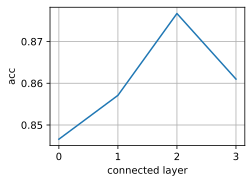

In [19]:
d2l.plot(list(range(len(acc_list))),acc_list,'connected layer','acc')

d. Adjust the learning rates and other training details

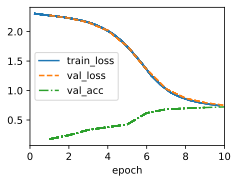

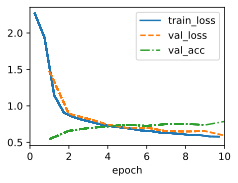

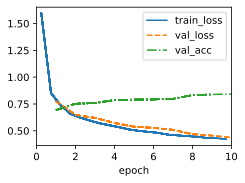

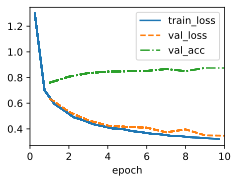

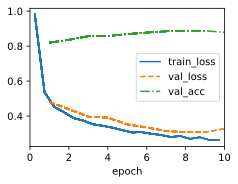

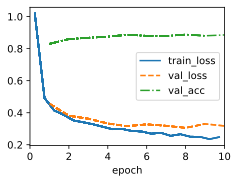

In [20]:
lr_list = [0.001,0.003,0.01,0.03,0.1,0.3]
acc_list = []
for lr in lr_list:
    batch_norm = nn.BatchNorm2d(convs[0][0])
    hparams = {'convs':[[6,5,2],[16,5,0]], 'linears':[120,84],'lr':lr}
    model = ParamLeNet(**hparams)
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
    trainer = d2l.Trainer(max_epochs=10)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32).unsqueeze(dim=1))
    acc_list.append(model.accuracy(y_hat,data.val.targets).item())

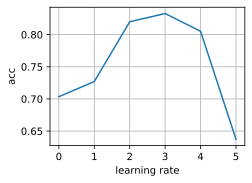

In [21]:
d2l.plot(list(range(len(acc_list))),acc_list,'learning rate','acc')